In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/gfarina/miniconda3/envs/py3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [59]:
import csv

In [11]:
# mpl.use("pgf")
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False,    # don't setup fonts from rc parameters
        "pgf.preamble": [
            "\\usepackage{times}",
            "\\usepackage[T1]{fontenc}",
            "\\usepackage{bm}",
            "\\usepackage{amsmath}",
            "\\usepackage{amssymb}",
    ],
    "pgf.texsystem": "pdflatex",
})

/home/gfarina/miniconda3/envs/py3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [12]:
from os import listdir
from os.path import isfile, join
import json
import re

In [60]:
# GAME='kuhn'
GAME='leduc'

In [61]:
def get_ib_data(k,et,st):
    curves = []
#     print(">>>> IB <<<<")
    for f in listdir('.'):
        if isfile(join('.', f)) and f.startswith('ib__') and GAME in f and ('k%s_' % k) in f and et in f and st in f:
            print(f)
            d = open(f).read()
            d = d[:-8] + d[-7:]
            curves += [json.loads(d)["data"]]
    return curves
def get_mccfr_data(k):
    curves = []
#     print(">>>> MCCFR <<<<")
    for f in listdir('.'):
        if isfile(join('.', f)) and f.startswith('os_mccfr__') and GAME in f and ('k%s_' % k) in f :
#             print(f)
            d = open(f).read()
            d = d[:-8] + d[-7:]
            curves += [json.loads(d)["data"]]
    return curves

In [72]:
def get_nfsp_data():
    reg = r"\[(\d+)\] Exploitability AVG ([\d.]+)"
    curves = []
    for f in listdir('.'):
        if isfile(join('.', f)) and GAME + '_nsfp' in f:
            d = open(f).readlines()
            curves += [[]]
            for line in d:
                matches = re.search(reg, line)
                if matches is not None:
                    curves[-1] += [{
                        'iteration': int(matches[1]),
                        'exploitability': float(matches[2])
                    }]
    return curves
def get_qpg_data():
    reg = r"(\d+): ([\d.]+)"
    curves = []
    for f in listdir('.'):
        if isfile(join('.', f)) and GAME + '_qpg_' in f:
            d = open(f).readlines()
            curves += [[]]
            for line in d:
                matches = re.search(reg, line)
                if matches is not None:
                    curves[-1] += [{
                        'iteration': int(matches[1]),
                        'exploitability': float(matches[2])
                    }]
    return curves
def get_rpg_data():
    reg = r"(\d+): ([\d.]+)"
    curves = []
    for f in listdir('.'):
        if isfile(join('.', f)) and GAME + '_rpg_' in f:
            d = open(f).readlines()
            curves += [[]]
            for line in d:
                matches = re.search(reg, line)
                if matches is not None:
                    curves[-1] += [{
                        'iteration': int(matches[1]),
                        'exploitability': float(matches[2])
                    }]
    return curves

In [137]:
if GAME == 'leduc':
    def get_rpg_data():
        curves = [[], [], [], [], []]
        for row in csv.DictReader(open("rpg_leduc2p.csv"), delimiter=',', quotechar='"'):
            if row['critic_learning_rate'] == '0.01' and row['batch_size'] == '128' and row['num_critic_before_pi'] == '64' and row['pi_learning_rate'] == '0.05':
                curves[int(row['replica'])] += [{'iteration': int(row['episode']), 'exploitability': float(row['expl'])}]
        for x in curves:
            print(len(x))
        return curves
    def get_qpg_data():
        curves = [[], [], [], [], []]
        for row in csv.DictReader(open("qpg_leduc2p.csv"), delimiter=',', quotechar='"'):
            if row['critic_learning_rate'] == '0.01' and row['batch_size'] == '64' and row['num_critic_before_pi'] == '128' and row['pi_learning_rate'] == '0.05':
                curves[int(row['replica'])] += [{'iteration': int(row['episode']), 'exploitability': float(row['expl'])}]
        for x in curves:
            print(len(x))
        return curves

In [138]:
def stdup(y):
    return np.max(y) #np.mean(y) + 2*np.std(y)
def stddown(y):
    return np.min(y) #np.mean(y) - 2*np.std(y)

In [139]:
def plot(ax, data, color, ls, label, xxx=False):
    N = len(data[0])
    print(N)
    xs = [dp['iteration'] for dp in data[0]]
    ys = [[] for _ in range(N)]

    for curve in data:
        for i, dp in enumerate(curve):
            if i >= len(xs):
                continue
            iteration = dp['iteration']
#             if iteration > 10**7:
#                 continue
            exploitab = dp['exploitability']

            assert xs[i] == iteration
            ys[i] += [exploitab]

#     print(ys)
    if xxx:
        xs = xs[:500]
        ys = ys[:500]
        
    ax.semilogy(xs, [np.mean(y) for y in ys], color=color, ls=ls, label=label)
    ax.fill_between(xs, [stdup(y) for y in ys], [stddown(y) for y in ys], color=color, alpha=.2)

ib__45_k10_uni_conv_leduc3.json
ib__42_k10_uni_conv_leduc3.json
ib__41_k10_uni_conv_leduc3.json
ib__43_k10_uni_conv_leduc3.json
ib__44_k10_uni_conv_leduc3.json
1001
998
500
0
0
500
500
500
1000
500
1000
500
1000
1000
1001


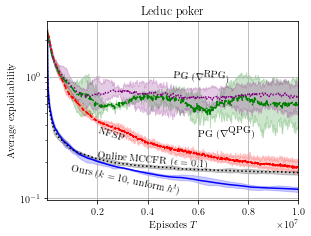

In [141]:
fig, ax = plt.subplots(figsize=(4.5,3.3))

if GAME == 'kuhn':
    plot(ax, get_ib_data(k=10, et='uni', st='conv'), 'blue', '-', 'Ours ($k\!=\!10$, unif. $h^t$)')
    plot(ax, get_nfsp_data(), 'red', '--', 'NFSP')
    plot(ax, get_qpg_data(), 'green', '-.', 'Policy gradient ($\\nabla^{\\textrm{QPG}}$)')
    plot(ax, get_rpg_data(), 'purple', ':', 'Policy gradient ($\\nabla^{\\textrm{RPG}}$)', True)
    plot(ax, get_mccfr_data('0.1'), 'black', ':', 'MCCFR')
    
    ax.text(2.0e6, 0.0052, "Ours ($k=10$, unform $h^t$)", rotation=-7)
    ax.text(.8e6, 0.011, "Online MCCFR ($\epsilon=0.1$)", rotation=-8)
    ax.text(1.6e6, 0.03, "NFSP", rotation=-45)
    ax.text(3.5e6, 0.07, "PG ($\\nabla^{\\textrm{QPG}}$)", rotation=-20)
    ax.text(3.7e6, 0.030, "PG ($\\nabla^{\\textrm{RPG}}$)", rotation=-15)
    
    ax.grid()
#     ax.legend(fontsize='small',bbox_to_anchor=(0.02, 0.81, .96, 0.95), loc=3,
#        ncol=2, mode="expand", borderaxespad=0.)
    ax.set_title("Kuhn poker")
    ax.set_xlabel("Episodes $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("kuhn_nash.pdf", bbox_inches='tight')
else:
    assert GAME == 'leduc'
    
    plot(ax, get_ib_data(k=10, et='uni',st='conv'), 'blue', '-', 'Ours ($k=10$, unif. $h^t$)')
    plot(ax, get_nfsp_data(), 'red', '--', 'NFSP')
    plot(ax, get_qpg_data(), 'green', '-.', 'Policy gradient ($\\nabla^{\\textrm{QPG}}$)', True)
    plot(ax, get_rpg_data(), 'purple', ':', 'Policy gradient ($\\nabla^{\\textrm{RPG}}$)', True)
    plot(ax, get_mccfr_data('0.1'), 'black', ':', 'MCCFR')
    
    ax.text(0.9e6, 0.11, "Ours ($k=10$, unform $h^t$)", rotation=-12)
    ax.text(2.0e6, 0.18, "Online MCCFR ($\epsilon=0.1$)", rotation=-5)
    ax.text(2e6, 0.30, "NFSP", rotation=-18)
    ax.text(.6e7, .32, "PG ($\\nabla^{\\textrm{QPG}}$)", rotation=0)
    ax.text(.5e7, .89, "PG ($\\nabla^{\\textrm{RPG}}$)", rotation=-5)
    
    ax.grid()
#     ax.legend(fontsize='small',bbox_to_anchor=(0.02, 0.81, .96, 0.95), loc=3,
#        ncol=2, mode="expand", borderaxespad=0.)
    ax.set_title("Leduc poker")
    ax.set_xlabel("Episodes $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("leduc3_nash.pdf", bbox_inches='tight')

ib__44_k20_uni_conv_leduc3.json
ib__42_k20_uni_conv_leduc3.json
ib__45_k20_uni_conv_leduc3.json
ib__43_k20_uni_conv_leduc3.json
ib__41_k20_uni_conv_leduc3.json
1001
[1, 10001, 20001, 30001, 40001, 50001, 60001, 70001, 80001, 90001]
[2.37361, 1.3316620000000001, 1.0196231999999998, 0.8674050000000001, 0.7890179999999999, 0.733273, 0.6844066, 0.6441676, 0.6126532, 0.586345]


ValueError: zero-size array to reduction operation maximum which has no identity

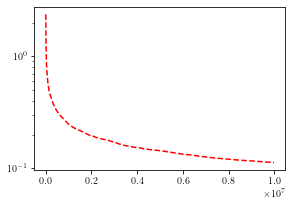

In [129]:
fig, ax = plt.subplots(figsize=(4.5,3.))


if GAME == 'kuhn':
    plot(ax, get_ib_data(k='20', et='uni', st='conv'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='uni', st='conv'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='uni', st='conv'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='uni', st='conv'), 'purple', ':', '$k=0.5$')

    ax.grid()
    ax.legend()
    ax.set_title("Kuhn poker (ours, uniform $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("kuhn_uni_conv.pdf", bbox_inches='tight')
else:
    assert GAME == 'leduc'
    plot(ax, get_ib_data(k='20', et='uni', st='conv'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='uni', st='conv'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='uni', st='conv'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='uni', st='conv'), 'purple', ':', '$k=0.5$')
    
#     plot(ax, get_nfsp_data(), 'red', '--', 'NFSP')
#     plot(ax, get_qpg_data(), 'green', '-.', 'Policy gradient ($\\nabla^{\\textrm{QPG}}$)')
#     plot(ax, get_rpg_data(), 'purple', ':', 'Policy gradient ($\\nabla^{\\textrm{RPG}}$)')
#     fig.legend()
    ax.legend()
    ax.grid()
    ax.set_title("Leduc poker (ours, uniform $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("leduc3_uni_conv.pdf", bbox_inches='tight')

ib__41_k20_uni_coin_kuhn.json
ib__44_k20_uni_coin_kuhn.json
ib__43_k20_uni_coin_kuhn.json
ib__45_k20_uni_coin_kuhn.json
ib__42_k20_uni_coin_kuhn.json
ib__41_k10_uni_coin_kuhn.json
ib__45_k10_uni_coin_kuhn.json
ib__44_k10_uni_coin_kuhn.json
ib__43_k10_uni_coin_kuhn.json
ib__42_k10_uni_coin_kuhn.json
ib__45_k1_uni_coin_kuhn.json
ib__43_k1_uni_coin_kuhn.json
ib__42_k1_uni_coin_kuhn.json
ib__41_k1_uni_coin_kuhn.json
ib__44_k1_uni_coin_kuhn.json
ib__42_k0.5_uni_coin_kuhn.json
ib__45_k0.5_uni_coin_kuhn.json
ib__43_k0.5_uni_coin_kuhn.json
ib__41_k0.5_uni_coin_kuhn.json
ib__44_k0.5_uni_coin_kuhn.json


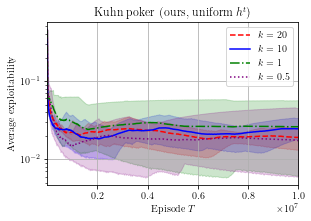

In [31]:
fig, ax = plt.subplots(figsize=(4.5,3.))


if GAME == 'kuhn':
    plot(ax, get_ib_data(k='20', et='uni', st='coin'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='uni', st='coin'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='uni', st='coin'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='uni', st='coin'), 'purple', ':', '$k=0.5$')

    ax.grid()
    ax.legend()
    ax.set_title("Kuhn poker (ours, uniform $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("kuhn_uni_coin.pdf", bbox_inches='tight')
else:
    assert GAME == 'leduc'
    plot(ax, get_ib_data(k='20', et='uni', st='coin'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='uni', st='coin'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='uni', st='coin'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='uni', st='coin'), 'purple', ':', '$k=0.5$')
    
    ax.legend()
    ax.grid()
    ax.set_title("Leduc poker (ours, uniform $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("leduc3_uni_coin.pdf", bbox_inches='tight')

ib__45_k20_bal_conv_kuhn.json
ib__41_k20_bal_conv_kuhn.json
ib__42_k20_bal_conv_kuhn.json
ib__43_k20_bal_conv_kuhn.json
ib__44_k20_bal_conv_kuhn.json
ib__44_k10_bal_conv_kuhn.json
ib__41_k10_bal_conv_kuhn.json
ib__45_k10_bal_conv_kuhn.json
ib__43_k10_bal_conv_kuhn.json
ib__42_k10_bal_conv_kuhn.json
ib__41_k1_bal_conv_kuhn.json
ib__45_k1_bal_conv_kuhn.json
ib__43_k1_bal_conv_kuhn.json
ib__44_k1_bal_conv_kuhn.json
ib__42_k1_bal_conv_kuhn.json
ib__41_k0.5_bal_conv_kuhn.json
ib__42_k0.5_bal_conv_kuhn.json
ib__44_k0.5_bal_conv_kuhn.json
ib__43_k0.5_bal_conv_kuhn.json
ib__45_k0.5_bal_conv_kuhn.json


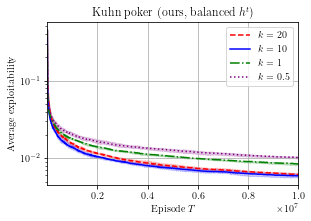

In [32]:
fig, ax = plt.subplots(figsize=(4.5,3.))


if GAME == 'kuhn':
    plot(ax, get_ib_data(k='20', et='bal', st='conv'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='bal', st='conv'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='bal', st='conv'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='bal', st='conv'), 'purple', ':', '$k=0.5$')

    ax.grid()
    ax.legend()
    ax.set_title("Kuhn poker (ours, balanced $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("kuhn_bal_conv.pdf", bbox_inches='tight')
else:
    assert GAME == 'leduc'
    plot(ax, get_ib_data(k='20', et='bal', st='conv'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='bal', st='conv'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='bal', st='conv'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='bal', st='conv'), 'purple', ':', '$k=0.5$')
    
#     plot(ax, get_nfsp_data(), 'red', '--', 'NFSP')
#     plot(ax, get_qpg_data(), 'green', '-.', 'Policy gradient ($\\nabla^{\\textrm{QPG}}$)')
#     plot(ax, get_rpg_data(), 'purple', ':', 'Policy gradient ($\\nabla^{\\textrm{RPG}}$)')
    ax.legend()
    ax.grid()
    ax.set_title("Leduc poker (balanced $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("leduc3_bal_conv.pdf", bbox_inches='tight')

ib__42_k20_bal_coin_kuhn.json
ib__41_k20_bal_coin_kuhn.json
ib__44_k20_bal_coin_kuhn.json
ib__43_k20_bal_coin_kuhn.json
ib__45_k20_bal_coin_kuhn.json
ib__42_k10_bal_coin_kuhn.json
ib__45_k10_bal_coin_kuhn.json
ib__41_k10_bal_coin_kuhn.json
ib__43_k10_bal_coin_kuhn.json
ib__44_k10_bal_coin_kuhn.json
ib__41_k1_bal_coin_kuhn.json
ib__42_k1_bal_coin_kuhn.json
ib__44_k1_bal_coin_kuhn.json
ib__45_k1_bal_coin_kuhn.json
ib__43_k1_bal_coin_kuhn.json
ib__44_k0.5_bal_coin_kuhn.json
ib__41_k0.5_bal_coin_kuhn.json
ib__45_k0.5_bal_coin_kuhn.json
ib__43_k0.5_bal_coin_kuhn.json
ib__42_k0.5_bal_coin_kuhn.json


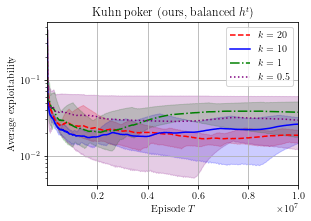

In [33]:
fig, ax = plt.subplots(figsize=(4.5,3.))


if GAME == 'kuhn':
    plot(ax, get_ib_data(k='20', et='bal', st='coin'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='bal', st='coin'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='bal', st='coin'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='bal', st='coin'), 'purple', ':', '$k=0.5$')

    ax.grid()
    ax.legend()
    ax.set_title("Kuhn poker (ours, balanced $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("kuhn_bal_coin.pdf", bbox_inches='tight')
else:
    assert GAME == 'leduc'
    plot(ax, get_ib_data(k='20', et='bal', st='coin'), 'red', '--', '$k=20$')
    plot(ax, get_ib_data(k='10', et='bal', st='coin'), 'blue', '-', '$k=10$')
    plot(ax, get_ib_data(k='1', et='bal', st='coin'), 'green', '-.', '$k=1$')
    plot(ax, get_ib_data(k='0.5', et='bal', st='coin'), 'purple', ':', '$k=0.5$')
    
#     plot(ax, get_nfsp_data(), 'red', '--', 'NFSP')
#     plot(ax, get_qpg_data(), 'green', '-.', 'Policy gradient ($\\nabla^{\\textrm{QPG}}$)')
#     plot(ax, get_rpg_data(), 'purple', ':', 'Policy gradient ($\\nabla^{\\textrm{RPG}}$)')
#     fig.legend()
    ax.grid()
    ax.legend()
    ax.set_title("Leduc poker (ours, balanced $h^t$)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("leduc3_bal_coin.pdf", bbox_inches='tight')

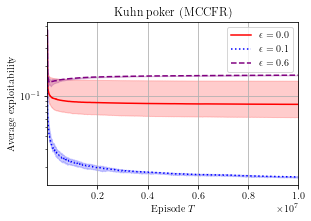

In [34]:
fig, ax = plt.subplots(figsize=(4.5,3.))


if GAME == 'kuhn':
    plot(ax, get_mccfr_data(k='0'), 'red', '-', '$\epsilon=0.0$')
    plot(ax, get_mccfr_data(k='0.1'), 'blue', ':', '$\epsilon=0.1$')
    plot(ax, get_mccfr_data(k='0.6'), 'purple', '--', '$\epsilon=0.6$')    

    ax.grid()
    ax.legend()
    ax.set_title("Kuhn poker (MCCFR)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("kuhn_mccfr.pdf", bbox_inches='tight')
else:
    assert GAME == 'leduc'
    plot(ax, get_mccfr_data(k='0'), 'red', '-', '$\epsilon=0.0$')
    plot(ax, get_mccfr_data(k='0.1'), 'blue', ':', '$\epsilon=0.1$')
    plot(ax, get_mccfr_data(k='0.6'), 'purple', '--', '$\epsilon=0.6$')    
    
#     plot(ax, get_nfsp_data(), 'red', '--', 'NFSP')
#     plot(ax, get_qpg_data(), 'green', '-.', 'Policy gradient ($\\nabla^{\\textrm{QPG}}$)')
#     plot(ax, get_rpg_data(), 'purple', ':', 'Policy gradient ($\\nabla^{\\textrm{RPG}}$)')
#     fig.legend()
    ax.grid()
    ax.legend()
    ax.set_title("Leduc poker (MCCFR)")
    ax.set_xlabel("Episode $T$")
    ax.set_ylabel("Average exploitability")
    ax.set_xlim((10,10e6))
    fig.savefig("leduc3_mccfr.pdf", bbox_inches='tight')